# Quicksort e Counting-sort

## Introduzione
Quicksort e Counting-sort sono due algoritmi di ordinamento crescente o decrescente, con funzionamento e tempi di esecuzione diversi. Di seguito ne analizzeremo il funzionamento, per poi dedurre delle conclusioni attraverso dei test.

## Quicksort

Quicksort è un algoritmo ricorsivo basato sul paradigma divide et impera ed è definito su un array generico $A[p..r]$ come:

**Divide:** partiziona l'array $A[p..r]$ in due sottoarray $A[p..q-1]$ e $A[q+1..r]$ tali che ogni elemento di $A[p..q-1]$ sia minore o qguale a $A[q]$ che, a sua volta, è minore p uguale a ogni elemento di $A[q+1..r]$. Calcoliamo l'indice di $q$ come parte di questa procedura di partizionamento.

**Impera:** ordina i due sottoarray $A[p..q-1]$ e $A[q+1..r]$ chiamando ricorsivamente quicksort.

**Combina:**    

Il seguente codice è l'implementazione di questa procedura.

In [71]:
def Quicksort(A,p,r):
    if p<r:
        q=Partition(A,p,r)
        Quicksort(A,p,q-1)
        Quicksort(A,q+1,r)

Per ordinare un array la chiamata iniziale è $Quicksort(A,0,len(A)-1)$.
Il funzionamento del Quicksort è basato principalmente sulla chiamata $Partition$ che seleziona sempre un elemento $A[r]$ come pivot con il quale partiziona l'array. Durante l'esecuzione della procedura, l'array viene suddiviso in quattro regioni che eventualmente possono essere anche vuote e ognuna di esse deve soddisfare 3 proprietà per ogni indice $k$:
1. Se $p\leq k \leq i$, allora $A[k]\leq x$
2. Se $i+1\leq k\leq j-1$, allora $A[k]>x$
3. Se $k=r$, allora $A[k]=x$

In [72]:
def Partition(A,p,r):
    x=A[r]
    i=p-1
    for j in range(p,r,1):
        if A[j]<=x:
            i=i+1
            A[i],A[j]=A[j],A[i]
    A[i+1],A[r]=A[r],A[i+1]
    return i+1

Il tempo di esecuzione atteso del quicksort è $\theta (nlgn)$ e nel caso peggiore è $\theta (n^2)$.

Un esempio di esecuzione può essere:


In [73]:
A=[10,4,6,11,12,9]
Quicksort(A,0,len(A)-1)
print(A)

[4, 6, 9, 10, 11, 12]


## Counting-sort
Counting-sort è un algoritmo di ordinamento in tempo lineare ma a differenza del quicksort può essere eseguito solo su numeri interi compresi tra $0$ e $k$ per qualche intero $k$.L'algoritmo conta il numero di occorrenze di ciascun valore presente nell'array $A$, memorizzando questa informazione in un array $C$ temporaneo di dimensione $k$. Il numero di ripetizioni dei valori inferiori indica la posizione del valore immediatamente successivo. Il seguente codice è implementazione di questa procedura.

In [74]:
def Counting_sort(A,B,k):
    C=[0]*(k+1)
    for j in range(len(A)):
        C[A[j]]=C[A[j]]+1
    for i in range(1,k+1,1):
        C[i]=C[i]+C[i-1]
    for j in range (len(A)-1,-1,-1):
        B[C[A[j]]-1]=A[j]
        C[A[j]]=C[A[j]]-1

Essendo un algoritmo di ordinamento in tempo lineare, il suo tempo di esecuzione atteso e peggiore risulta essere $\theta (n+k)$. A differenza del quicksort il counti-sort occupa molta più memoria.

Un esempio di esecuzione può essere:

In [75]:
A=[10,4,6,11,12,9]
B=[0]*len(A)
k=12
Counting_sort(A,B,k)
print(B)

[4, 6, 9, 10, 11, 12]


## Test
Per testare i tempi di esecuzione del quicksort e counting-sort eseguiremo tre test:
1. Massimo $n$ valori casuali.
2. Massimo $n$ valori ordinati.
3. Massimo $m$ valori casuali dove $m>n$.

Per generare la lista di valori ordinati useremo: 

In [76]:
def genera_num_ordinati(numero):
    x=[]
    for i in range(numero):
        x.append(i+1)
    return x

I numeri ordinati sono i numeri di un range ben definito.
Per generare la lista di valori casuali:

In [77]:
import random
def genera_num_casuali(numero):
    x=[]
    numeri=genera_num_ordinati(numero)
    while len(numeri) != 0:
        index=random.randint(0, len(numeri)-1)
        x.append(numeri[index])
        del numeri[index]
    return x

I numeri generati casualmente sono numeri ordinati ma presi in ordine casuale.
I valori generati con i metodi precedenti non sono valori distanti tra loro o grandi perché a noi interessa principalmente i confronti che vengono effettuati tra i valori e non il loro peso. 
Per semplificare la visione dei dati raccolti saranno esposti in un grafico generato con il seguente codice:

In [78]:
import matplotlib.pyplot as plt
def stampa_imagine(tempi_quick_sort,tempi_counting_sort,numero_test,ordine_valori):
    plt.title("Test numero "+numero_test+" con valori "+ordine_valori)
    plt.xlabel("Numero elementi")
    plt.ylabel("Tempo")
    plt.plot(tempi_quick_sort,color="red",label="Quicksort")
    plt.plot(tempi_counting_sort,color="blue",label="Counting-sort")
    plt.legend()
    plt.show()

Inoltre definiamo il massimo di un array e importiamo librerie necessarie per i test.

In [79]:
import timeit
import numpy

def max(A):
    max=A[0]
    for x in A:
        if x>max:
            max=x
    return max

### Test 1 su $n$ valori casuali
Il test sottostante raccoglierà i tempi di esecuzione del ordinamento per entrambi i algoritmi e gli renderà visibile a grafico. Saranno presi in esecuzione i ordinamenti fino a $n$ elementi.

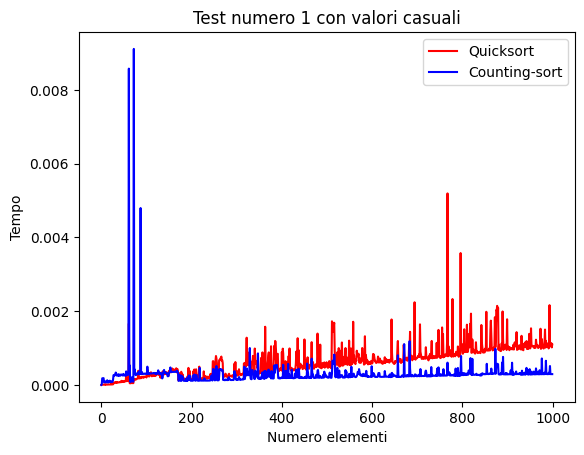

Media Quicksort: 0.00064021
Media Counting-sort: 0.00029378


In [80]:
n=1000
tempi_quicksort=[]
tempi_counting_sort=[]
tempi_quicksort.append(0)
tempi_counting_sort.append(0)
A=genera_num_casuali(n)
for i in range(1,n,1):
    B=[0]*i
    tempi_counting_sort.append(timeit.timeit(lambda:Counting_sort(A[0:i],B,max(A[0:i])),number=1))
    tempi_quicksort.append(timeit.timeit(lambda:Quicksort(A[0:i],0,i-1),number=1))
stampa_imagine(tempi_quicksort,tempi_counting_sort,"1","casuali")
print("Media Quicksort: "+str(format(numpy.mean(tempi_quicksort),'.8f')))
print("Media Counting-sort: "+str(format(numpy.mean(tempi_counting_sort),'.8f')))

### Test 2 su $n$ valori ordinati

Il test sottostante raccoglierà i tempi di esecuzione del ordinamento per entrambi i algoritmi e gli renderà visibile a grafico. Saranno presi in esecuzione i ordinamenti fino a $n$ elementi.

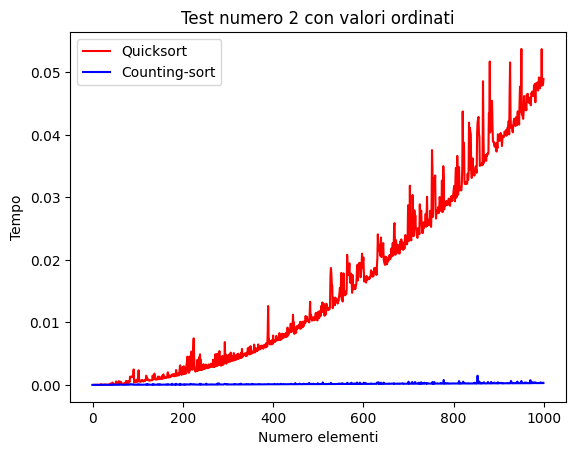

Media Quicksort: 0.01632120
Media Counting-sort: 0.00015960


In [81]:
n=1000
tempi_quicksort=[]
tempi_counting_sort=[]
tempi_quicksort.append(0)
tempi_counting_sort.append(0)
A=genera_num_ordinati(n)
for i in range(1,n,1):
    B=[0]*i
    tempi_counting_sort.append(timeit.timeit(lambda:Counting_sort(A[0:i],B,max(A[0:i])),number=1))
    tempi_quicksort.append(timeit.timeit(lambda:Quicksort(A[0:i],0,i-1),number=1))
stampa_imagine(tempi_quicksort,tempi_counting_sort,"2","ordinati")
print("Media Quicksort: "+str(format(numpy.mean(tempi_quicksort),'.8f')))
print("Media Counting-sort: "+str(format(numpy.mean(tempi_counting_sort),'.8f')))

### Test 3 su $m$ valori casuali

Il test sottostante raccoglierà i tempi di esecuzione del ordinamento per entrambi i algoritmi e gli renderà visibile a grafico. Saranno presi in esecuzione i ordinamenti fino a $m$ elementi.

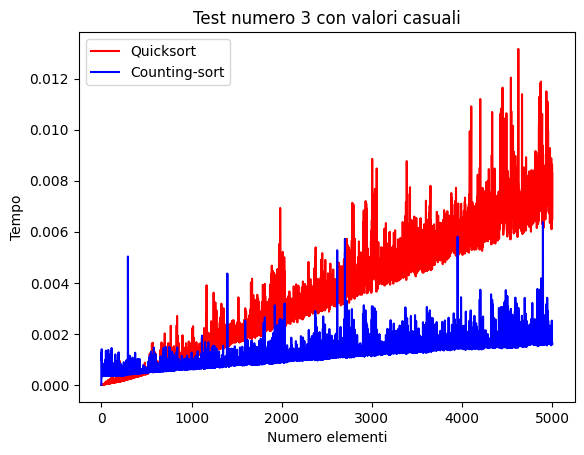

Media Quicksort: 0.00368072
Media Counting-sort: 0.00121775


In [82]:
m=5000
tempi_quicksort=[]
tempi_counting_sort=[]
tempi_quicksort.append(0)
tempi_counting_sort.append(0)
A=genera_num_casuali(m)
for i in range(1,m,1):
    B=[0]*i
    tempi_counting_sort.append(timeit.timeit(lambda:Counting_sort(A[0:i],B,max(A[0:i])),number=1))
    tempi_quicksort.append(timeit.timeit(lambda:Quicksort(A[0:i],0,i-1),number=1))
stampa_imagine(tempi_quicksort,tempi_counting_sort,"3","casuali")
print("Media Quicksort: "+str(format(numpy.mean(tempi_quicksort),'.8f')))
print("Media Counting-sort: "+str(format(numpy.mean(tempi_counting_sort),'.8f')))

## Conclusioni

Dai dati raccolti possiamo affermare che il Counting-sort non è influenzato dal ordine dei valori come ingresso a differenza del Quicksort che nel secondo test con valori già ordinati ha avuto una crescita quadratica, questo problema può essere ovviato utilizzando una versione del Quicksort radomizzata. Nei tre test il tempo di esecuzione del Counting-sort è stato per lo più lineare ma portando un costo in termini di memoria molto maggiori in confronto a Quicksort. Pur essendo più performante la limitazione di poter ordinare solo valori interi e l'alto consumo di memoria rendono il Counting-sort più preferibile da utilizzare al intero di altri algoritmi d'ordinamento, come algoritmo stabile. Il Quicksort nel caso medio stabilisce dei tempi di esecuzione come $\theta (nlgn)$ e il suo ridotto costo di memoria fa si che tra i algoritmi di ordinamento è il preferibile nella maggior parte delle situazioni.